In [37]:
# %load keras_LeNet.py
# 필요한 패키지 불러오기
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1671)  # 재현을 위한 설정

In [22]:
import keras 

In [23]:
keras.__version__

'2.3.1'

In [53]:
K.__version__

AttributeError: module 'keras.backend' has no attribute '__version__'

## 모델을 클래스로 정의하기 

In [46]:

# convnet 정의
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Flatten => RELU 계층
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # 소프트맥스 분류기
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model



## 신경망에 대한 설정

In [47]:
# 신경망과 학습에 대한 설정
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2

IMG_ROWS, IMG_COLS = 28, 28  # 입력 이미지 차원
NB_CLASSES = 10  # 출력 갯수 = 숫자의 갯수
INPUT_SHAPE = ( IMG_ROWS, IMG_COLS,1)   # 텐서플로우 처리 기준

# 데이터 : 섞은 후에 학습 데이터와 테스트 데이터로 분할
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#K.set_image_dim_ordering("tf")

# 실수 형태로 지정하고 정규화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 60000개 x [ 28 x 28  x 1] 형태의 입력을 CONVNET에 전달
X_train = X_train[:,  :, :, np.newaxis]
X_test = X_test[:,  :, :, np.newaxis,]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 클래스 벡터를 이진 클래스 행렬로 변환
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


60000 train samples
10000 test samples


In [48]:
X_train.shape

(60000, 28, 28, 1)

## 케라스 버전 2.3.1

- validation_split  실행됨 

In [49]:
# 옵티마이저와 모델 초기화
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
              metrics=["accuracy"])

history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 30s 632us/step - loss: 0.1776 - accuracy: 0.9464 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 2/20
48000/48000 [==============================] - 31s 652us/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0458 - val_accuracy: 0.9855
Epoch 3/20
48000/48000 [==============================] - 31s 636us/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0391 - val_accuracy: 0.9879
Epoch 4/20
48000/48000 [==============================] - 32s 674us/step - loss: 0.0237 - accuracy: 0.9929 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 5/20
48000/48000 [==============================] - 33s 679us/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0370 - val_accuracy: 0.9887
Epoch 6/20
48000/48000 [==============================] - 31s 655us/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 7/20
48000/48000 [==============================] 

In [50]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [51]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


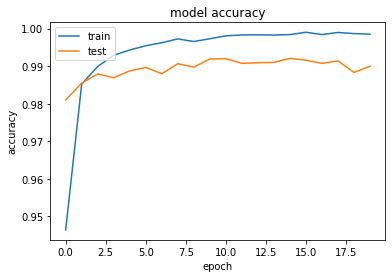

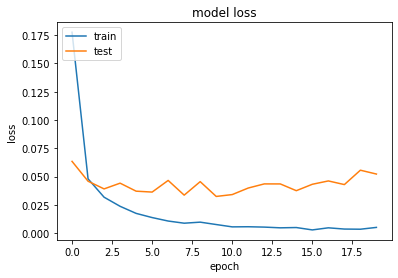

In [52]:
# 히스토리에 있는 모든 데이터 나열
print(history.history.keys())
# 단순 정확도에 대한 히스토리 요약
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# 손실에 대한 히스토리 요약
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()